<a href="https://colab.research.google.com/github/xujianmead20200213/CSC587/blob/main/group1_HeartDisease_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load raw data

In [95]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
#read csv file from google drive
# Specify the path to your CSV file
# file_path = '/content/heart_2020_cleaned.csv'  # Update this to your specific file path
file_path = '/content/drive/MyDrive/content/heart_2020_cleaned.csv'  # Jian's file path
# Read the CSV file
df = pd.read_csv(file_path)

In [98]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [99]:
# Check if there are any None/NaN values in the DataFrame
has_none = df.isna().any().any()
has_none

False

In [100]:
#check Null values
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [101]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [102]:
#change text value into numbers

df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})
df['Smoking'] = df['Smoking'].replace({'No': 0, 'Yes': 1})
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace({'No': 0, 'Yes': 1})
df['Stroke'] = df['Stroke'].replace({'No': 0, 'Yes': 1})
df['DiffWalking'] = df['DiffWalking'].replace({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].replace({'Male': 0, 'Female': 1})
df['Asthma'] = df['Asthma'].replace({'No': 0, 'Yes': 1})
df['KidneyDisease'] = df['KidneyDisease'].replace({'No': 0, 'Yes': 1})
df['SkinCancer'] = df['SkinCancer'].replace({'No': 0, 'Yes': 1})
df['PhysicalActivity'] = df['PhysicalActivity'].replace({'No': 0, 'Yes': 1})

In [103]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [104]:
#Change AgeCategory to average of each AgeCategory
df['AgeCategory'] = df['AgeCategory'].replace({'18-24': 21,
                                               '25-29': 27,
                                               '30-34': 32,
                                               '35-39': 37,
                                               '40-44': 42,
                                               '45-49': 47,
                                               '50-54': 52,
                                               '55-59': 57,
                                               '60-64': 62,
                                               '65-69': 67,
                                               '70-74': 72,
                                               '75-79': 77,
                                               '80 or older': 82,})

In [105]:
df['Diabetic'].unique()


array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [106]:
df['Diabetic'] = df['Diabetic'].replace({'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1, 'Yes': 1})

In [107]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [108]:
df['Race'] = df['Race'].replace({'White': 0,
                                 'Black': 1,
                                 'Asian': 2,
                                 'American Indian/Alaskan Native': 3,
                                 'Hispanic': 4,
                                 'Other': 5,})

In [109]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [110]:
df['GenHealth'] = df['GenHealth'].replace({'Excellent': 5,
                                           'Very good': 4,
                                           'Good': 3,
                                           'Poor': 2,
                                           'Fair': 1,})

In [111]:
# change the HeartDisease comlum to the end
to_move = ['HeartDisease']
new = df.columns.difference(to_move).to_list()+to_move
df = df[new]
df

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke,HeartDisease
0,57,0,1,16.60,1,0,4,0,30.0,1,3.0,0,1,1,5.0,1,0,0
1,82,0,0,20.34,0,0,4,0,0.0,1,0.0,0,1,0,7.0,0,1,0
2,67,0,1,26.58,1,0,1,0,30.0,1,20.0,0,0,0,8.0,1,0,0
3,77,0,0,24.21,0,0,3,0,0.0,0,0.0,0,1,1,6.0,0,0,0
4,42,0,0,23.71,0,1,4,0,0.0,1,28.0,0,1,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,62,0,1,27.41,1,1,1,0,0.0,0,7.0,4,0,0,6.0,1,0,1
319791,37,0,1,29.84,0,0,4,0,0.0,1,0.0,4,0,0,5.0,1,0,0
319792,47,0,0,24.24,0,0,3,0,0.0,1,0.0,4,1,0,6.0,0,0,0
319793,27,0,0,32.81,0,0,3,0,0.0,0,0.0,4,1,0,12.0,0,0,0


In [112]:
#check positive of HeartDisease
df['HeartDisease'].value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

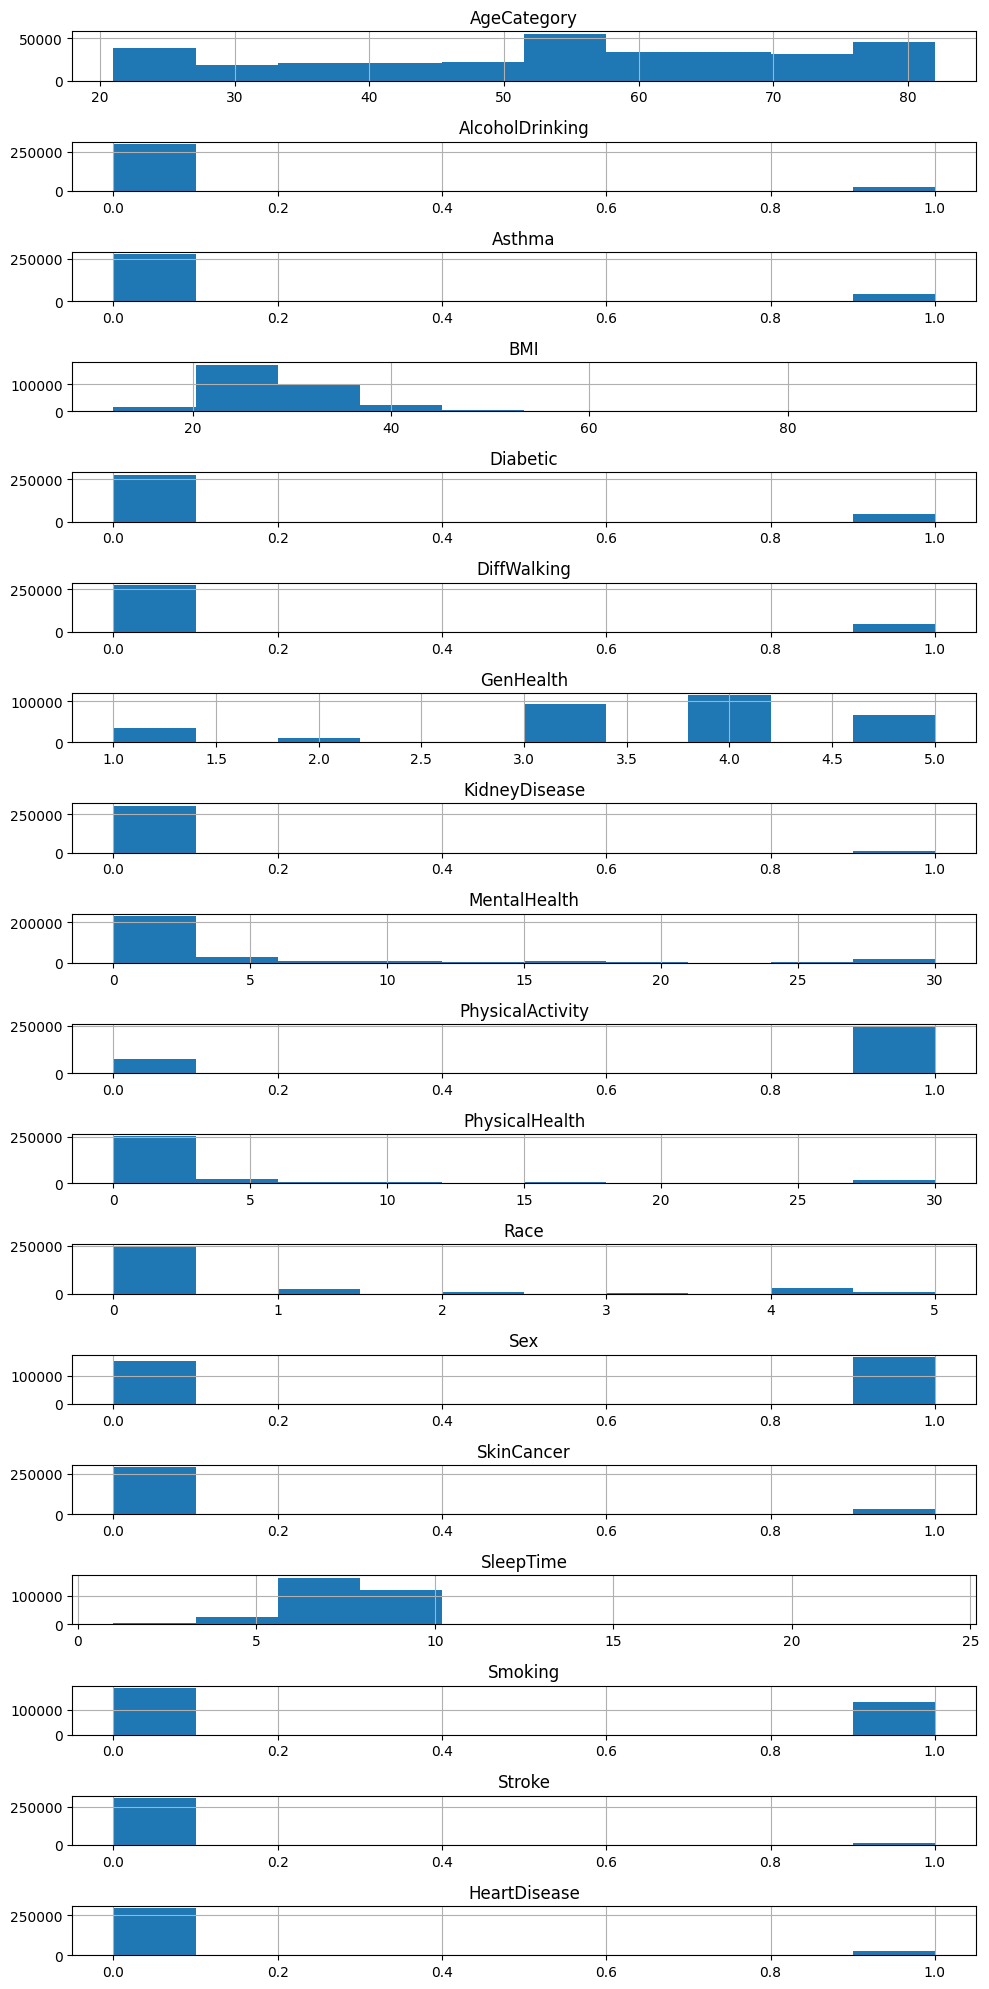

In [113]:
# visulization
numeric_cols = df.select_dtypes(include=['number']).columns
# Create histograms for each numeric column
df[numeric_cols].hist(bins=10, figsize=(10, 20), layout=(len(numeric_cols), 1))
# Adjust layout
plt.tight_layout()
plt.show()

In [114]:
# pip install scikit-learn
# Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris #iris data set which is built in

# import main libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz #this is for visualizing your tree. Make sure that you have graphviz installed (>conda install graphviz)

In [119]:
# identify features and drop other useless columns (Feature Extraction)
X = df.drop(columns='HeartDisease', axis=1)
y = df['HeartDisease']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

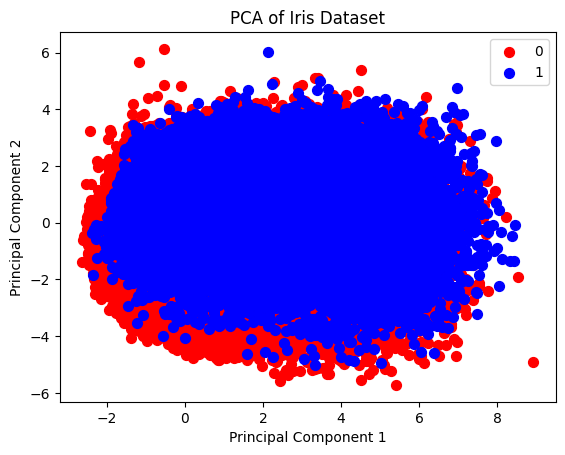

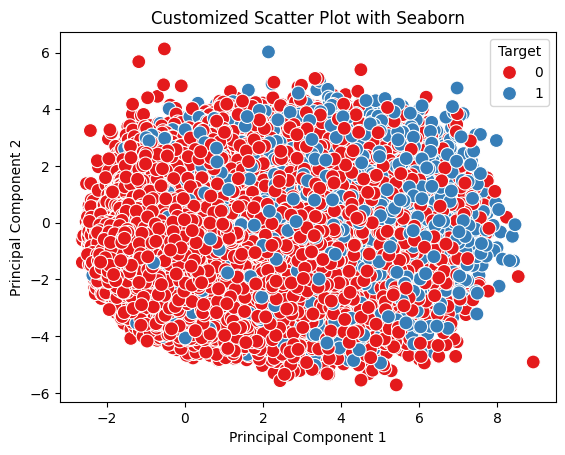

In [120]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
principal_components.shape

# Create a DataFrame for visualization
data = np.column_stack((principal_components, y))
columns = ['Principal Component 1', 'Principal Component 2', 'Target']
df_pca = pd.DataFrame(data, columns=columns)
df_pca['Target'] = df_pca['Target'].astype(int)

# Visualize the results
fig, ax = plt.subplots()
colors = ['red', 'blue']
targets = [0, 1]

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
               df_pca.loc[indices_to_keep, 'Principal Component 2'],
               c=color,
               s=50)

ax.legend(targets)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Iris Dataset')

plt.show()

sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue = 'Target', palette='Set1', s=100)
plt.title('Customized Scatter Plot with Seaborn')
plt.show()

**Try Decision Tree**

In [121]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn import tree
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(X_train, y_train) #first paramater data, second labels
y_pred = clf.predict(X_train) #predicting
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() #compare with the ground truth
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} Training accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 204755 FP: 18 FN: 656 TP: 18427 Training accuracy: 1.00


**Test it**

In [122]:
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} test accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 80737 FP: 6912 FN: 6172 TP: 2118 test accuracy: 0.86


**KNN version**

In [123]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} Training accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 202388 FP: 2385 FN: 12596 TP: 6487 Training accuracy: 0.93


**Test KNN version**

In [124]:
y_pred = neigh.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} test accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 85124 FP: 2525 FN: 7283 TP: 1007 test accuracy: 0.90


In [125]:
#AUC
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
y_true = y_test.astype(int)
y_pred = y_pred.astype(int)
print("AUC(1 is the best):",roc_auc_score(y_true, y_pred))

AUC(1 is the best): 0.546331782896362


In [126]:
#check mean,std,min,max,25% 50% 75% of each column.
df.describe()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke,HeartDisease
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,54.506812,0.068097,0.134061,28.325399,0.135590,0.138870,3.521894,0.036833,3.898366,0.775362,3.37171,0.685142,0.524727,0.093244,7.097075,0.412477,0.037740,0.085595
std,17.945479,0.251912,0.340718,6.356100,0.342353,0.345812,1.178460,0.188352,7.955235,0.417344,7.95085,1.441218,0.499389,0.290775,1.436007,0.492281,0.190567,0.279766
min,21.000000,0.000000,0.000000,12.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,24.030000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,57.000000,0.000000,0.000000,27.340000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000
75%,67.000000,0.000000,0.000000,31.420000,0.000000,0.000000,4.000000,0.000000,3.000000,1.000000,2.00000,0.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,94.850000,1.000000,1.000000,5.000000,1.000000,30.000000,1.000000,30.00000,5.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000


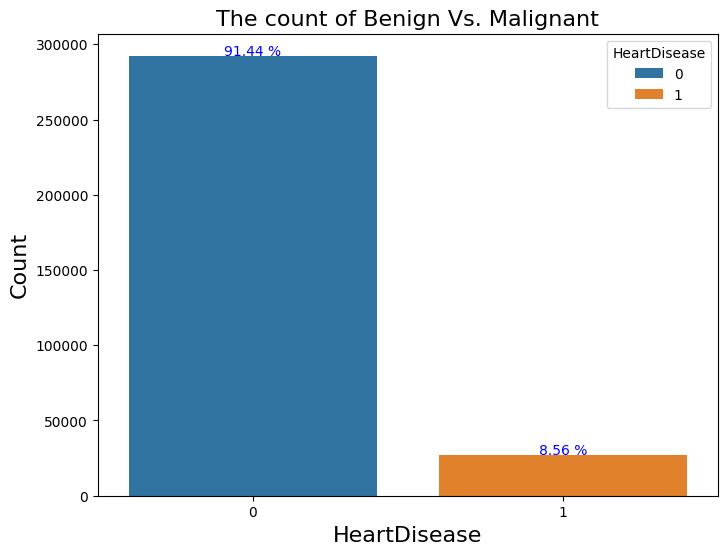

In [127]:
# plot the percentage of target column values
replicates = df['HeartDisease'].value_counts()

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df, order=replicates.index, hue='HeartDisease')
plt.title('The count of Benign Vs. Malignant', fontsize=16, c='k')
plt.xlabel('HeartDisease', fontsize=16, c='k')
plt.ylabel('Count', fontsize=16, c='k')

#this part is just for labeling the bars
for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(data):.2f} %'
    plt.text(x=i, y=each_count+5, s=each_text,ha='center', c='b')

plt.show()

#sns.countplot(data=data, x='diagnosis', hue='diagnosis')

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=X_train.columns[:18],
                     class_names=y_train.name,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
m,n=df.shape

X=df.iloc[:,0:n-1].as_matrix()
y=df.iloc[:,n-1].as_matrix()

C=1e+03
gamma=1e-05
clf = svm.SVC(C=C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=gamma, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(X, y)